In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r Newzeleand_2018

In [5]:
Newzeleand_2018

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
24,24,TD Astle (NZ),3,2,1,5,5,5.00,3,166.66,...,79,3,2/50,26.33,6.58,24.0,0,0,2,0
38,38,TA Boult (NZ),12,5,2,26,13,8.66,20,130.00,...,636,22,5/17,28.90,5.92,29.2,0,1,3,0
52,52,MS Chapman (NZ),3,3,0,9,8,3.00,23,39.13,...,-,-,-,-,-,-,-,-,0,0
75,75,C de Grandhomme (NZ),10,9,2,178,74*,25.42,150,118.66,...,264,5,2/40,52.80,4.63,68.4,0,0,4,0
97,97,LH Ferguson (NZ),9,4,3,29,19,29.00,49,59.18,...,392,19,5/45,20.63,5.13,24.1,0,1,1,0
106,106,MJ Guptill (NZ),10,10,1,423,100,47.00,578,73.18,...,-,-,-,-,-,-,-,-,6,0
116,116,MJ Henry (NZ),2,-,-,-,-,-,-,-,...,106,5,4/53,21.20,5.30,24.0,1,0,2,0
153,153,TWM Latham (NZ),13,11,0,299,79,27.18,341,87.68,...,-,-,-,-,-,-,-,-,9,1
206,206,C Munro (NZ),13,13,0,254,58,19.53,219,115.98,...,209,6,2/10,34.83,4.86,43.0,0,0,5,0
225,225,HM Nicholls (NZ),13,12,3,220,55,24.44,302,72.84,...,-,-,-,-,-,-,-,-,5,0


In [6]:
Newzeleand_2018=Newzeleand_2018.reset_index()

In [7]:
Newzeleand_2018

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,24,24,TD Astle (NZ),3,2,1,5,5,5.00,3,...,79,3,2/50,26.33,6.58,24.0,0,0,2,0
1,38,38,TA Boult (NZ),12,5,2,26,13,8.66,20,...,636,22,5/17,28.90,5.92,29.2,0,1,3,0
2,52,52,MS Chapman (NZ),3,3,0,9,8,3.00,23,...,-,-,-,-,-,-,-,-,0,0
3,75,75,C de Grandhomme (NZ),10,9,2,178,74*,25.42,150,...,264,5,2/40,52.80,4.63,68.4,0,0,4,0
4,97,97,LH Ferguson (NZ),9,4,3,29,19,29.00,49,...,392,19,5/45,20.63,5.13,24.1,0,1,1,0
5,106,106,MJ Guptill (NZ),10,10,1,423,100,47.00,578,...,-,-,-,-,-,-,-,-,6,0
6,116,116,MJ Henry (NZ),2,-,-,-,-,-,-,...,106,5,4/53,21.20,5.30,24.0,1,0,2,0
7,153,153,TWM Latham (NZ),13,11,0,299,79,27.18,341,...,-,-,-,-,-,-,-,-,9,1
8,206,206,C Munro (NZ),13,13,0,254,58,19.53,219,...,209,6,2/10,34.83,4.86,43.0,0,0,5,0
9,225,225,HM Nicholls (NZ),13,12,3,220,55,24.44,302,...,-,-,-,-,-,-,-,-,5,0


In [8]:
Newzeleand_2018.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
Newzeleand_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,TD Astle (NZ),3,2,1,5,5,5.00,3,166.66,0,...,79,3,2/50,26.33,6.58,24.0,0,0,2,0
1,TA Boult (NZ),12,5,2,26,13,8.66,20,130.00,0,...,636,22,5/17,28.90,5.92,29.2,0,1,3,0
2,MS Chapman (NZ),3,3,0,9,8,3.00,23,39.13,0,...,-,-,-,-,-,-,-,-,0,0
3,C de Grandhomme (NZ),10,9,2,178,74*,25.42,150,118.66,0,...,264,5,2/40,52.80,4.63,68.4,0,0,4,0
4,LH Ferguson (NZ),9,4,3,29,19,29.00,49,59.18,0,...,392,19,5/45,20.63,5.13,24.1,0,1,1,0
5,MJ Guptill (NZ),10,10,1,423,100,47.00,578,73.18,1,...,-,-,-,-,-,-,-,-,6,0
6,MJ Henry (NZ),2,-,-,-,-,-,-,-,-,...,106,5,4/53,21.20,5.30,24.0,1,0,2,0
7,TWM Latham (NZ),13,11,0,299,79,27.18,341,87.68,0,...,-,-,-,-,-,-,-,-,9,1
8,C Munro (NZ),13,13,0,254,58,19.53,219,115.98,0,...,209,6,2/10,34.83,4.86,43.0,0,0,5,0
9,HM Nicholls (NZ),13,12,3,220,55,24.44,302,72.84,0,...,-,-,-,-,-,-,-,-,5,0


In [10]:
Newzeleand_2018_players =Newzeleand_2018.copy()

In [11]:
Newzeleand_2018_players.drop('Player',axis=1,inplace=True)

In [12]:
Newzeleand_2018_players.HS=Newzeleand_2018_players.HS.str.extract('(\d+)')
Newzeleand_2018_players['HS'].fillna(value=0, inplace=True)


In [13]:
Newzeleand_2018_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,3,2,1,5,5,5.00,3,166.66,0,0,...,79,3,2/50,26.33,6.58,24.0,0,0,2,0
1,12,5,2,26,13,8.66,20,130.00,0,0,...,636,22,5/17,28.90,5.92,29.2,0,1,3,0
2,3,3,0,9,8,3.00,23,39.13,0,0,...,-,-,-,-,-,-,-,-,0,0
3,10,9,2,178,74,25.42,150,118.66,0,1,...,264,5,2/40,52.80,4.63,68.4,0,0,4,0
4,9,4,3,29,19,29.00,49,59.18,0,0,...,392,19,5/45,20.63,5.13,24.1,0,1,1,0
5,10,10,1,423,100,47.00,578,73.18,1,2,...,-,-,-,-,-,-,-,-,6,0
6,2,-,-,-,0,-,-,-,-,-,...,106,5,4/53,21.20,5.30,24.0,1,0,2,0
7,13,11,0,299,79,27.18,341,87.68,0,3,...,-,-,-,-,-,-,-,-,9,1
8,13,13,0,254,58,19.53,219,115.98,0,2,...,209,6,2/10,34.83,4.86,43.0,0,0,5,0
9,13,12,3,220,55,24.44,302,72.84,0,3,...,-,-,-,-,-,-,-,-,5,0


In [14]:
Newzeleand_2018_players.replace("-",0,inplace=True)

In [15]:
Newzeleand_2018_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

Newzeleand_2018_players_scaled = pd.DataFrame(scaler.fit_transform(Newzeleand_2018_players),columns=Newzeleand_2018_players.columns)
Newzeleand_2018_players_scaled.shape
Newzeleand_2018_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-1.296675,-1.117676,-0.311086,-0.909750,-0.936298,-0.904376,-0.881553,1.992291,-0.441942,-0.811503,...,-0.604207,-0.472779,-0.368478,0.380397,1.333730,0.052007,-0.365148,-0.365148,-0.759125,-0.25
1,0.859752,-0.396138,0.570323,-0.797057,-0.768970,-0.740069,-0.806665,1.122798,-0.441942,-0.811503,...,1.841393,2.245340,2.465292,0.520152,1.083488,0.284200,-0.365148,2.738613,-0.379563,-0.25
2,-1.296675,-0.877163,-1.192494,-0.888285,-0.873550,-0.994162,-0.793450,-1.032434,-0.441942,-0.811503,...,-0.604207,-0.858293,-0.815915,-1.051403,-1.161103,-1.019653,-0.365148,-0.365148,-1.518251,-0.25
3,0.380546,0.565912,0.570323,0.018624,0.506905,0.012332,-0.233992,0.853839,-0.441942,-0.045083,...,-0.115087,0.430008,-0.070186,1.819811,0.594380,2.034578,-0.365148,-0.365148,0.000000,-0.25
4,0.140943,-0.636651,1.451732,-0.780958,-0.643474,0.173048,-0.678915,-0.556893,-0.441942,-0.811503,...,-0.604207,1.054638,2.017854,0.070437,0.783957,0.056472,-0.365148,2.738613,-1.138688,-0.25


In [17]:
Newzeleand_2018_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,...,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01
mean,-5.224579e-17,-5.877651e-17,-6.530724e-17,1.306145e-17,1.306145e-17,-1.591864e-16,-1.959217e-17,7.183796e-17,3.265362e-18,1.306145e-17,...,-3.918434e-17,4.571507e-17,-3.918434e-17,-1.175530e-16,-3.918434e-17,-5.224579e-17,-1.959217e-17,-3.265362e-17,-2.612289e-17,1.632681e-18
std,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,...,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00
min,-1.775881e+00,-1.598701e+00,-1.192494e+00,-9.365815e-01,-1.040878e+00,-1.128840e+00,-8.947685e-01,-1.960509e+00,-4.419417e-01,-8.115027e-01,...,-6.042071e-01,-8.582927e-01,-8.159150e-01,-1.051403e+00,-1.161103e+00,-1.019653e+00,-3.651484e-01,-3.651484e-01,-1.518251e+00,-2.500000e-01
25%,-1.296675e+00,-8.771633e-01,-1.192494e+00,-7.970571e-01,-7.689700e-01,-7.400692e-01,-7.934495e-01,-5.315147e-01,-4.419417e-01,-8.115027e-01,...,-6.042071e-01,-8.582927e-01,-8.159150e-01,-1.051403e+00,-1.161103e+00,-1.019653e+00,-3.651484e-01,-3.651484e-01,-7.591253e-01,-2.500000e-01
50%,3.805460e-01,8.488678e-02,-3.110855e-01,-4.214143e-01,-4.552303e-01,-7.386168e-02,-4.850874e-01,1.190631e-01,-4.419417e-01,-8.115027e-01,...,-6.042071e-01,-4.727786e-01,-3.684778e-01,7.043685e-02,5.943796e-01,5.200702e-02,-3.651484e-01,-3.651484e-01,0.000000e+00,-2.500000e-01
75%,8.597521e-01,8.064244e-01,5.703234e-01,4.264650e-01,5.069050e-01,1.730481e-01,4.355939e-01,6.484432e-01,-4.419417e-01,7.213357e-01,...,-1.150871e-01,9.131201e-01,3.772510e-01,6.615370e-01,8.104974e-01,4.538795e-01,-3.651484e-01,-3.651484e-01,3.795626e-01,-2.500000e-01
max,1.099355e+00,1.527962e+00,1.451732e+00,2.492500e+00,2.744915e+00,2.968965e+00,2.272551e+00,1.992291e+00,2.563262e+00,2.254174e+00,...,2.819633e+00,2.245340e+00,2.465292e+00,1.819811e+00,1.333730e+00,2.034578e+00,2.738613e+00,2.738613e+00,1.897813e+00,4.000000e+00


In [18]:
X =  Newzeleand_2018_players_scaled.iloc[:,:].values

In [19]:
X

array([[-1.29667525, -1.11767587, -0.31108551, -0.90974987, -0.93629792,
        -0.90437646, -0.88155301,  1.99229087, -0.44194174, -0.81150267,
        -0.5547002 , -0.83495633, -0.9749135 , -1.47225938, -1.29667525,
        -0.49747164, -0.56407285, -0.6042071 , -0.47277861, -0.36847776,
         0.38039739,  1.33372986,  0.05200702, -0.36514837, -0.36514837,
        -0.75912528, -0.25      ],
       [ 0.85975207, -0.39613828,  0.57032343, -0.79705705, -0.76897004,
        -0.74006921, -0.80666506,  1.12279821, -0.44194174, -0.81150267,
        -0.5547002 , -0.76800229, -0.66799628, -1.35360115,  0.85975207,
         1.67099449,  1.97386293,  1.84139308,  2.24533958,  2.4652917 ,
         0.52015153,  1.08348824,  0.28419999, -0.36514837,  2.73861279,
        -0.37956264, -0.25      ],
       [-1.29667525, -0.87716334, -1.19249445, -0.88828457, -0.87354996,
        -0.99416184, -0.79344954, -1.03243359, -0.44194174, -0.81150267,
         0.23112508, -0.83495633, -0.9749135 , -1.2349

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(Newzeleand_2018_players_scaled))

False

In [23]:
Newzeleand_2018_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-1.296675,-1.117676,-0.311086,-0.909750,-0.936298,-0.904376,-0.881553,1.992291,-0.441942,-0.811503,...,-0.604207,-0.472779,-0.368478,0.380397,1.333730,0.052007,-0.365148,-0.365148,-0.759125,-0.25
1,0.859752,-0.396138,0.570323,-0.797057,-0.768970,-0.740069,-0.806665,1.122798,-0.441942,-0.811503,...,1.841393,2.245340,2.465292,0.520152,1.083488,0.284200,-0.365148,2.738613,-0.379563,-0.25
2,-1.296675,-0.877163,-1.192494,-0.888285,-0.873550,-0.994162,-0.793450,-1.032434,-0.441942,-0.811503,...,-0.604207,-0.858293,-0.815915,-1.051403,-1.161103,-1.019653,-0.365148,-0.365148,-1.518251,-0.25
3,0.380546,0.565912,0.570323,0.018624,0.506905,0.012332,-0.233992,0.853839,-0.441942,-0.045083,...,-0.115087,0.430008,-0.070186,1.819811,0.594380,2.034578,-0.365148,-0.365148,0.000000,-0.25
4,0.140943,-0.636651,1.451732,-0.780958,-0.643474,0.173048,-0.678915,-0.556893,-0.441942,-0.811503,...,-0.604207,1.054638,2.017854,0.070437,0.783957,0.056472,-0.365148,2.738613,-1.138688,-0.25
5,0.380546,0.806424,-0.311086,1.333374,1.050721,0.981117,1.651422,-0.224844,1.060660,0.721336,...,-0.604207,-0.858293,-0.815915,-1.051403,-1.161103,-1.019653,-0.365148,-0.365148,0.759125,-0.25
6,-1.536278,-1.598701,-1.192494,-0.936581,-1.040878,-1.128840,-0.894769,-1.960509,-0.441942,-0.811503,...,-0.115087,-0.341021,-0.070186,0.101433,0.848413,0.052007,2.738613,-0.365148,-0.759125,-0.25
7,1.099355,1.046937,-1.192494,0.667950,0.611485,0.091343,0.607396,0.119063,-0.441942,1.487755,...,-0.604207,-0.858293,-0.815915,-1.051403,-1.161103,-1.019653,-0.365148,-0.365148,1.897813,4.00
8,1.099355,1.527962,-1.192494,0.426465,0.172249,-0.252086,0.069965,0.790275,-0.441942,0.721336,...,-0.115087,0.161612,0.078960,0.842619,0.681585,0.900404,-0.365148,-0.365148,0.379563,-0.25
9,1.099355,1.287449,1.451732,0.244010,0.109501,-0.031663,0.435594,-0.232908,-0.441942,1.487755,...,-0.604207,-0.858293,-0.815915,-1.051403,-1.161103,-1.019653,-0.365148,-0.365148,0.379563,-0.25


In [24]:
np.all(np.isfinite(Newzeleand_2018_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


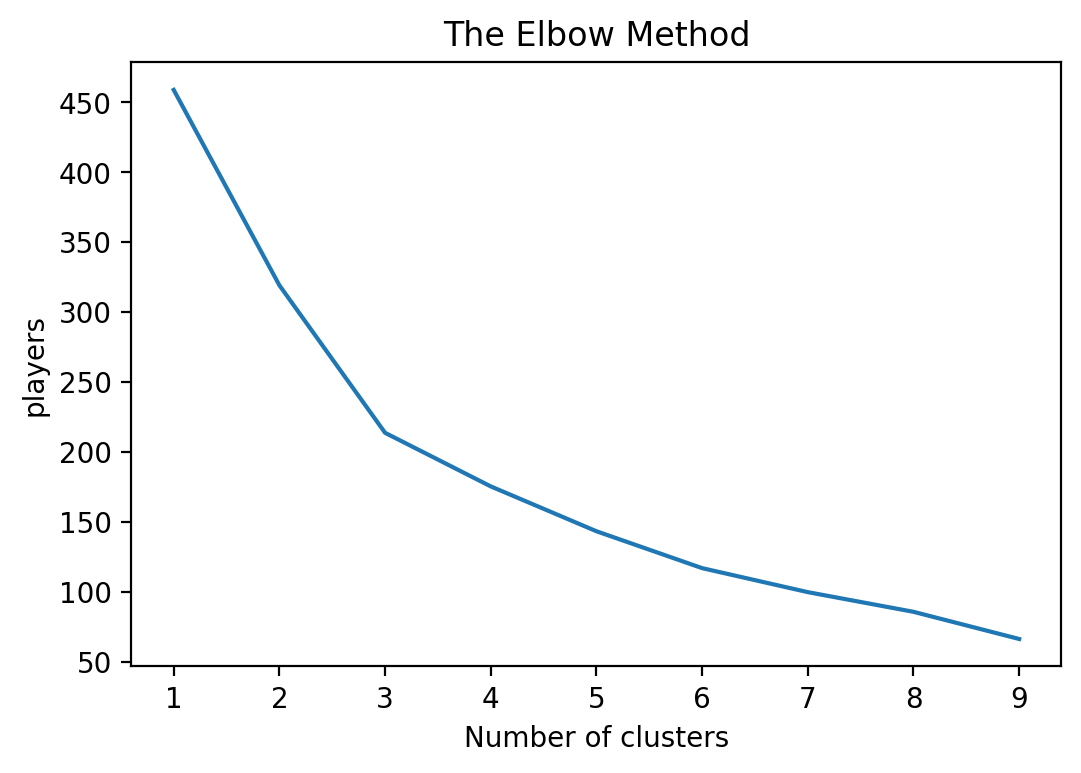

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([1, 0, 1, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 1, 2, 1])

In [28]:
kmeans.cluster_centers_

array([[ 0.48323301,  0.15360464,  0.44440787, -0.27959003, -0.21917843,
        -0.10740293, -0.39572528,  0.54896423, -0.44194174, -0.26406039,
         0.00660357, -0.15585101,  0.25275535, -0.08952784,  0.48323301,
         1.144367  ,  1.09906724,  0.79327872,  1.0699748 ,  0.95252755,
         0.98128581,  0.82349694,  0.93995375,  0.07824608,  0.52164053,
        -0.05422323, -0.25      ],
       [-1.44043707, -1.21388089, -0.83993087, -0.87111233, -0.86936677,
        -0.84601596, -0.80314092, -0.69853513, -0.44194174, -0.81150267,
        -0.39753514, -0.82156552, -0.9749135 , -0.16362869, -1.44043707,
        -0.75768758, -0.71336319, -0.5063831 , -0.67773546, -0.57728183,
        -0.53447561, -0.26023344, -0.59098888,  0.25560386, -0.36514837,
        -0.98686286, -0.25      ],
       [ 0.76391085,  0.99883439,  0.21775986,  1.26253837,  1.17621657,
         0.99638006,  1.35715631, -0.07001479,  1.06066017,  1.18118722,
         0.38829014,  1.03975694,  0.621056  ,  0.2889

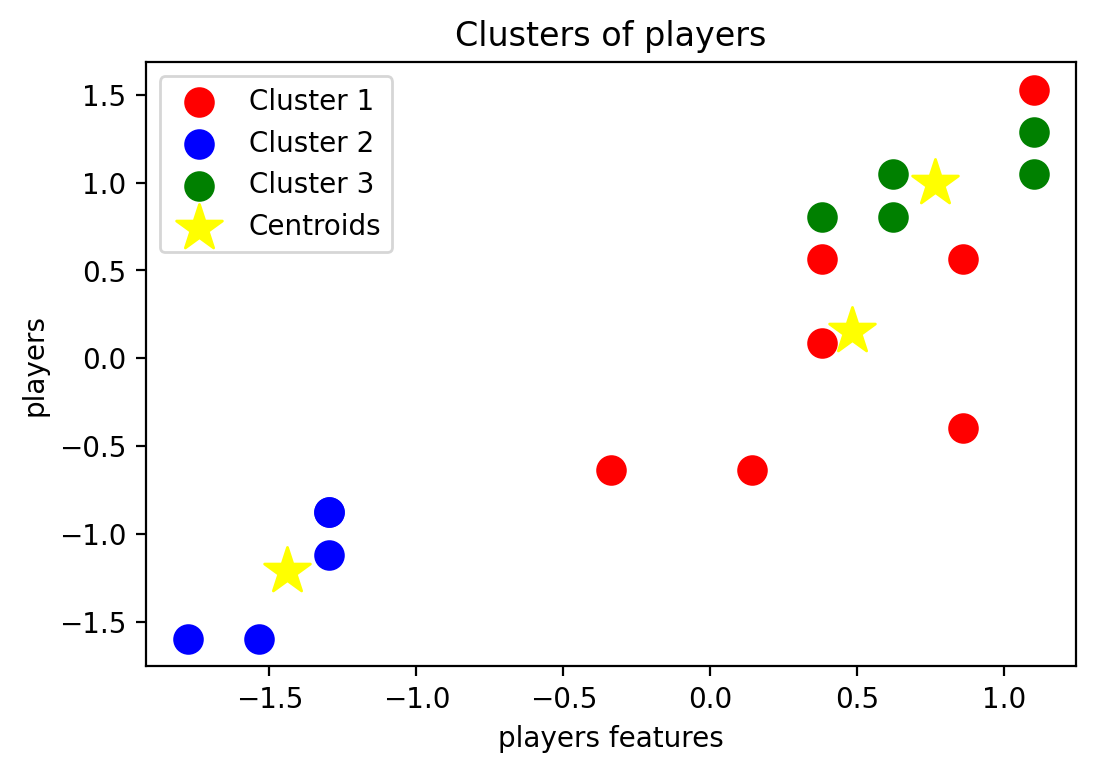

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
Newzeleand_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,TD Astle (NZ),3,2,1,5,5,5.00,3,166.66,0,...,79,3,2/50,26.33,6.58,24.0,0,0,2,0
1,TA Boult (NZ),12,5,2,26,13,8.66,20,130.00,0,...,636,22,5/17,28.90,5.92,29.2,0,1,3,0
2,MS Chapman (NZ),3,3,0,9,8,3.00,23,39.13,0,...,-,-,-,-,-,-,-,-,0,0
3,C de Grandhomme (NZ),10,9,2,178,74*,25.42,150,118.66,0,...,264,5,2/40,52.80,4.63,68.4,0,0,4,0
4,LH Ferguson (NZ),9,4,3,29,19,29.00,49,59.18,0,...,392,19,5/45,20.63,5.13,24.1,0,1,1,0
5,MJ Guptill (NZ),10,10,1,423,100,47.00,578,73.18,1,...,-,-,-,-,-,-,-,-,6,0
6,MJ Henry (NZ),2,-,-,-,-,-,-,-,-,...,106,5,4/53,21.20,5.30,24.0,1,0,2,0
7,TWM Latham (NZ),13,11,0,299,79,27.18,341,87.68,0,...,-,-,-,-,-,-,-,-,9,1
8,C Munro (NZ),13,13,0,254,58,19.53,219,115.98,0,...,209,6,2/10,34.83,4.86,43.0,0,0,5,0
9,HM Nicholls (NZ),13,12,3,220,55,24.44,302,72.84,0,...,-,-,-,-,-,-,-,-,5,0


In [31]:
Newzeleand_2018["cluster"] = y_kmeans

In [32]:
Newzeleand_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,TD Astle (NZ),3,2,1,5,5,5.00,3,166.66,0,...,3,2/50,26.33,6.58,24.0,0,0,2,0,1
1,TA Boult (NZ),12,5,2,26,13,8.66,20,130.00,0,...,22,5/17,28.90,5.92,29.2,0,1,3,0,0
2,MS Chapman (NZ),3,3,0,9,8,3.00,23,39.13,0,...,-,-,-,-,-,-,-,0,0,1
3,C de Grandhomme (NZ),10,9,2,178,74*,25.42,150,118.66,0,...,5,2/40,52.80,4.63,68.4,0,0,4,0,0
4,LH Ferguson (NZ),9,4,3,29,19,29.00,49,59.18,0,...,19,5/45,20.63,5.13,24.1,0,1,1,0,0
5,MJ Guptill (NZ),10,10,1,423,100,47.00,578,73.18,1,...,-,-,-,-,-,-,-,6,0,2
6,MJ Henry (NZ),2,-,-,-,-,-,-,-,-,...,5,4/53,21.20,5.30,24.0,1,0,2,0,1
7,TWM Latham (NZ),13,11,0,299,79,27.18,341,87.68,0,...,-,-,-,-,-,-,-,9,1,2
8,C Munro (NZ),13,13,0,254,58,19.53,219,115.98,0,...,6,2/10,34.83,4.86,43.0,0,0,5,0,0
9,HM Nicholls (NZ),13,12,3,220,55,24.44,302,72.84,0,...,-,-,-,-,-,-,-,5,0,2


In [33]:
Newzeleand_2018['cluster'].value_counts()

0    7
1    5
2    5
Name: cluster, dtype: int64

In [34]:
Newzeleand_Cluster_2018 = np.array([7,5,5])

In [35]:
Newzeleand_Cluster_2018

array([7, 5, 5])

In [36]:
%store Newzeleand_Cluster_2018

Stored 'Newzeleand_Cluster_2018' (ndarray)


In [37]:
Newzeleand_2018_players_scaled.insert(0, 'Player', Newzeleand_2018.Player)

In [38]:
Newzeleand_2018_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,TD Astle (NZ),-1.296675,-1.117676,-0.311086,-0.909750,-0.936298,-0.904376,-0.881553,1.992291,-0.441942,...,-0.604207,-0.472779,-0.368478,0.380397,1.333730,0.052007,-0.365148,-0.365148,-0.759125,-0.25
1,TA Boult (NZ),0.859752,-0.396138,0.570323,-0.797057,-0.768970,-0.740069,-0.806665,1.122798,-0.441942,...,1.841393,2.245340,2.465292,0.520152,1.083488,0.284200,-0.365148,2.738613,-0.379563,-0.25
2,MS Chapman (NZ),-1.296675,-0.877163,-1.192494,-0.888285,-0.873550,-0.994162,-0.793450,-1.032434,-0.441942,...,-0.604207,-0.858293,-0.815915,-1.051403,-1.161103,-1.019653,-0.365148,-0.365148,-1.518251,-0.25
3,C de Grandhomme (NZ),0.380546,0.565912,0.570323,0.018624,0.506905,0.012332,-0.233992,0.853839,-0.441942,...,-0.115087,0.430008,-0.070186,1.819811,0.594380,2.034578,-0.365148,-0.365148,0.000000,-0.25
4,LH Ferguson (NZ),0.140943,-0.636651,1.451732,-0.780958,-0.643474,0.173048,-0.678915,-0.556893,-0.441942,...,-0.604207,1.054638,2.017854,0.070437,0.783957,0.056472,-0.365148,2.738613,-1.138688,-0.25
5,MJ Guptill (NZ),0.380546,0.806424,-0.311086,1.333374,1.050721,0.981117,1.651422,-0.224844,1.060660,...,-0.604207,-0.858293,-0.815915,-1.051403,-1.161103,-1.019653,-0.365148,-0.365148,0.759125,-0.25
6,MJ Henry (NZ),-1.536278,-1.598701,-1.192494,-0.936581,-1.040878,-1.128840,-0.894769,-1.960509,-0.441942,...,-0.115087,-0.341021,-0.070186,0.101433,0.848413,0.052007,2.738613,-0.365148,-0.759125,-0.25
7,TWM Latham (NZ),1.099355,1.046937,-1.192494,0.667950,0.611485,0.091343,0.607396,0.119063,-0.441942,...,-0.604207,-0.858293,-0.815915,-1.051403,-1.161103,-1.019653,-0.365148,-0.365148,1.897813,4.00
8,C Munro (NZ),1.099355,1.527962,-1.192494,0.426465,0.172249,-0.252086,0.069965,0.790275,-0.441942,...,-0.115087,0.161612,0.078960,0.842619,0.681585,0.900404,-0.365148,-0.365148,0.379563,-0.25
9,HM Nicholls (NZ),1.099355,1.287449,1.451732,0.244010,0.109501,-0.031663,0.435594,-0.232908,-0.441942,...,-0.604207,-0.858293,-0.815915,-1.051403,-1.161103,-1.019653,-0.365148,-0.365148,0.379563,-0.25


In [39]:
Newzeleand_2018_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,TD Astle (NZ),-0.904376,0.380397
1,TA Boult (NZ),-0.740069,0.520152
2,MS Chapman (NZ),-0.994162,-1.051403
3,C de Grandhomme (NZ),0.012332,1.819811
4,LH Ferguson (NZ),0.173048,0.070437
5,MJ Guptill (NZ),0.981117,-1.051403
6,MJ Henry (NZ),-1.128840,0.101433
7,TWM Latham (NZ),0.091343,-1.051403
8,C Munro (NZ),-0.252086,0.842619
9,HM Nicholls (NZ),-0.031663,-1.051403


In [40]:
Newzeleand_2018_Ave=Newzeleand_2018_players_scaled.mean()

In [41]:
Newzeleand_2018_Ave

Mat_x          -5.224579e-17
Inns_x         -5.877651e-17
NO             -6.530724e-17
Runs_x          1.306145e-17
HS              1.306145e-17
Ave_x          -1.591864e-16
BF             -1.959217e-17
SR_x            7.183796e-17
100             3.265362e-18
50              1.306145e-17
0              -1.044916e-16
4s              2.612289e-17
6s              5.877651e-17
Unnamed: 0_y   -1.436759e-16
Mat_y          -5.224579e-17
Inns_y          8.489941e-17
Overs          -1.110223e-16
Mdns           -3.918434e-17
Runs_y          4.571507e-17
Wkts           -3.918434e-17
Ave_y          -1.175530e-16
Econ           -3.918434e-17
SR_y           -5.224579e-17
4              -1.959217e-17
5              -3.265362e-17
Ct             -2.612289e-17
St              1.632681e-18
dtype: float64

In [42]:
Newzeleand_Ave_2018 =Newzeleand_2018_Ave[['Ave_x','Ave_y']]

In [43]:
Newzeleand_Ave_2018

Ave_x   -1.591864e-16
Ave_y   -1.175530e-16
dtype: float64

In [44]:
Newzeleand_Ave_2018 = np.array([Newzeleand_Ave_2018.Ave_x, Newzeleand_Ave_2018.Ave_y])

In [45]:
Newzeleand_Ave_2018

array([-1.59186390e-16, -1.17553026e-16])

In [46]:
%store Newzeleand_Ave_2018

Stored 'Newzeleand_Ave_2018' (ndarray)


In [47]:
Newzeleand_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,TD Astle (NZ),3,2,1,5,5,5.00,3,166.66,0,...,3,2/50,26.33,6.58,24.0,0,0,2,0,1
1,TA Boult (NZ),12,5,2,26,13,8.66,20,130.00,0,...,22,5/17,28.90,5.92,29.2,0,1,3,0,0
2,MS Chapman (NZ),3,3,0,9,8,3.00,23,39.13,0,...,-,-,-,-,-,-,-,0,0,1
3,C de Grandhomme (NZ),10,9,2,178,74*,25.42,150,118.66,0,...,5,2/40,52.80,4.63,68.4,0,0,4,0,0
4,LH Ferguson (NZ),9,4,3,29,19,29.00,49,59.18,0,...,19,5/45,20.63,5.13,24.1,0,1,1,0,0
5,MJ Guptill (NZ),10,10,1,423,100,47.00,578,73.18,1,...,-,-,-,-,-,-,-,6,0,2
6,MJ Henry (NZ),2,-,-,-,-,-,-,-,-,...,5,4/53,21.20,5.30,24.0,1,0,2,0,1
7,TWM Latham (NZ),13,11,0,299,79,27.18,341,87.68,0,...,-,-,-,-,-,-,-,9,1,2
8,C Munro (NZ),13,13,0,254,58,19.53,219,115.98,0,...,6,2/10,34.83,4.86,43.0,0,0,5,0,0
9,HM Nicholls (NZ),13,12,3,220,55,24.44,302,72.84,0,...,-,-,-,-,-,-,-,5,0,2
